##**Problem Statement :**

Jamboree is a educational institution which mainly focuses on the students who want to pursue their educational dreams in abroad. It has already placed a lot of students in the past. So based on the previous experiences/data,  the institution now planning to implement a prediction model which gives the probabilistic result whether the candidate can get placed into the IVY college league based on his past educational background.

So we are considering a linear regression model with some of the features which can help predict us about the chances of admission for a individual candidate.

**Features:**

- GRE Score
- TOEFL Score
- University Rating
- Statement Of Purpose and Letter of Recommendation Strength
- CGPA
- Research (Any research done by the candidate in past or not)
- Chance of Admit (Target Variable)

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
import scipy.stats as stats

In [147]:
original_df = pd.read_csv('https://raw.githubusercontent.com/venkatkrishna556/Data_Science_Case_Studies/main/Jamboree_Education.csv')
original_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [148]:
original_df.shape

(500, 9)

####**Duplicate Value Check :**

In [149]:
original_df[original_df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


***There are no duplicate values in the dataset.***

####**Finding Missing Values:**

In [150]:
original_df.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


***There are no null values found in the data.***

In [151]:
col_list = original_df.columns

for i in range(0, len(col_list)):
  col_name = col_list[i]
  count = original_df[col_name].nunique()
  print(f"Column ::: {col_name} Unique record count :: {count}")


Column ::: Serial No. Unique record count :: 500
Column ::: GRE Score Unique record count :: 49
Column ::: TOEFL Score Unique record count :: 29
Column ::: University Rating Unique record count :: 5
Column ::: SOP Unique record count :: 9
Column ::: LOR  Unique record count :: 9
Column ::: CGPA Unique record count :: 184
Column ::: Research Unique record count :: 2
Column ::: Chance of Admit  Unique record count :: 61


By the above unique record counts, we can infer that

1) **'Research'** feature indicates a **categorical feature** where it says that a candidate has done the research or not

2) **GRE, TOEFL, SOP, LRA, CGPA are the dicrete features** which tells about the education scores the candidate has got in the respective exams.

3) **Serial No.** is the **unique identifier feature** for every individual candidate.

4) **'Chance of Admit'** is the **dependent feature** ranging from 0 to 1 whereas **rest all** the features are the **independent features**.


***We can drop the Serial No. column as this is only meant for row identification which is least bohered when we are trying to build a model.***

In [152]:
ds_with_necessary_cols = original_df.drop(columns=['Serial No.'])
ds_with_necessary_cols.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


###**Outlier Treatment :**

Before going into scaling, let's check for outliers

<Axes: >

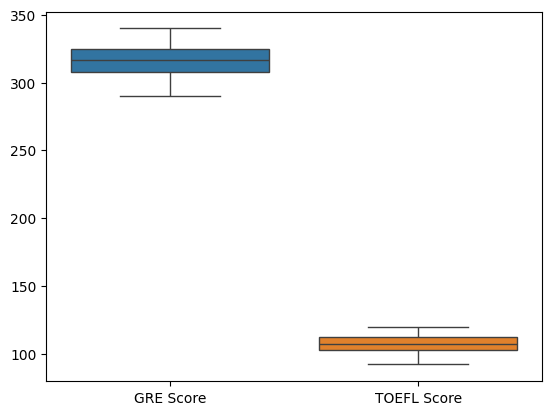

In [153]:
sns.boxplot(ds_with_necessary_cols[['GRE Score', 'TOEFL Score']])

## **Variate Analysis**

###**UniVariate Analysis**

In [154]:
ds_with_necessary_cols.columns = ds_with_necessary_cols.columns.str.strip()

In [155]:
ds_with_necessary_cols.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

**Numerical Data Distributions :**

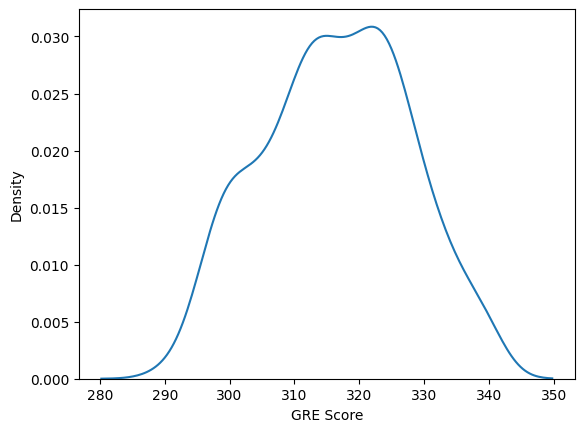

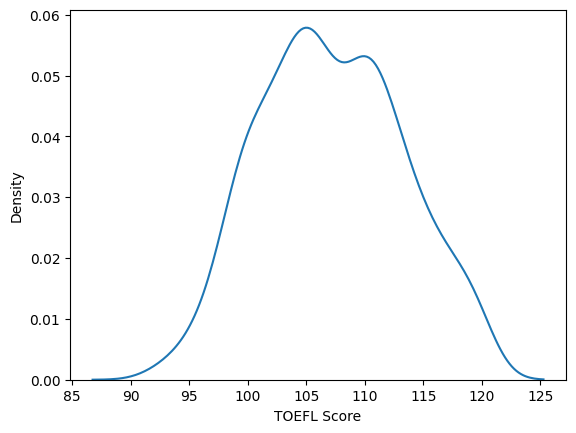

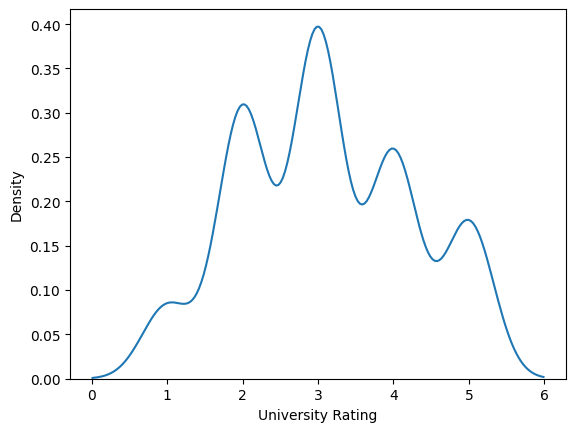

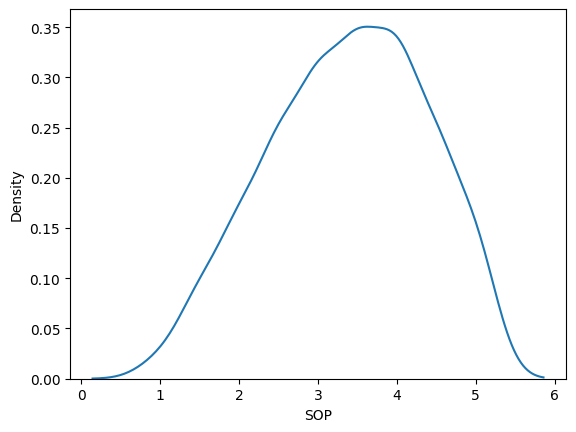

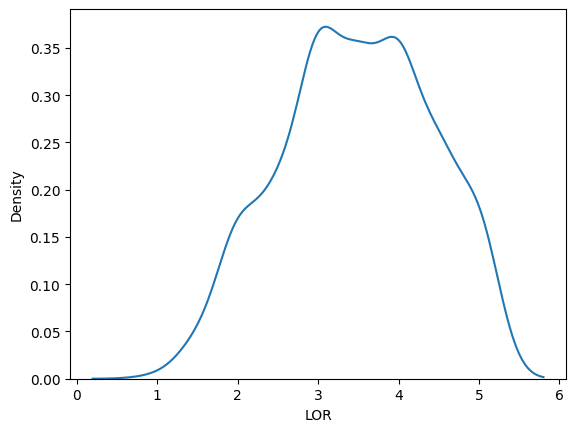

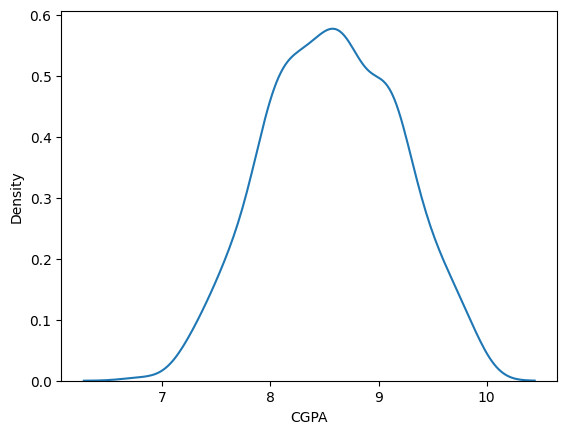

In [156]:
num_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']

for col in num_cols:
  plt.figure()
  sns.kdeplot(ds_with_necessary_cols[col])

<Axes: xlabel='Research', ylabel='count'>

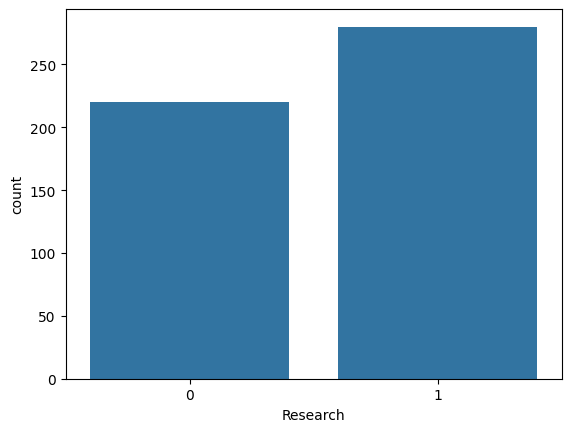

In [157]:
sns.countplot(x=ds_with_necessary_cols['Research'])

Here we can observe that the people who have done the research are higher in number.

###**Bi-Variate Analysis**

<Axes: xlabel='Research', ylabel='Chance of Admit'>

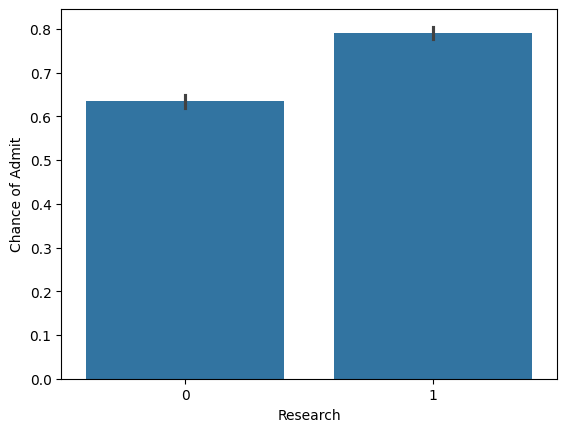

In [158]:
sns.barplot(x='Research', y='Chance of Admit', data=ds_with_necessary_cols)

***Here we can interpret that the people who have done the researcha are having high Chance of admission.***

<Axes: xlabel='GRE Score', ylabel='Chance of Admit'>

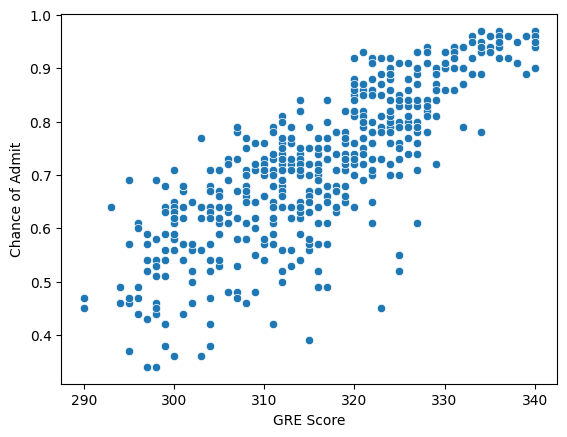

In [159]:
sns.scatterplot(x='GRE Score', y='Chance of Admit', data=ds_with_necessary_cols)

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit'>

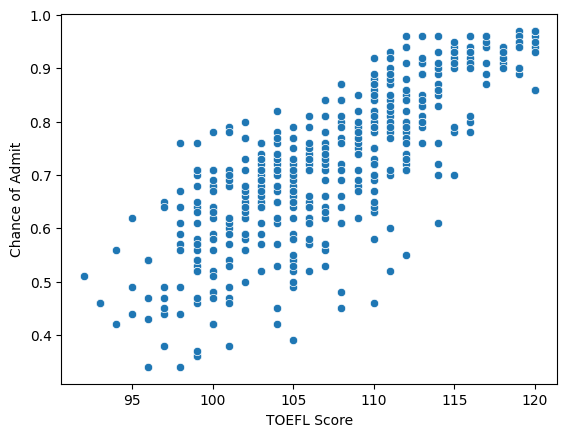

In [160]:
sns.scatterplot(x='TOEFL Score', y='Chance of Admit', data=ds_with_necessary_cols)

We can observe that there is a ***linear relationship*** between 'GRE Score', 'TOEFL Score' with Chance of Admit but with ***high amount of variance***

<Axes: xlabel='University Rating', ylabel='Chance of Admit'>

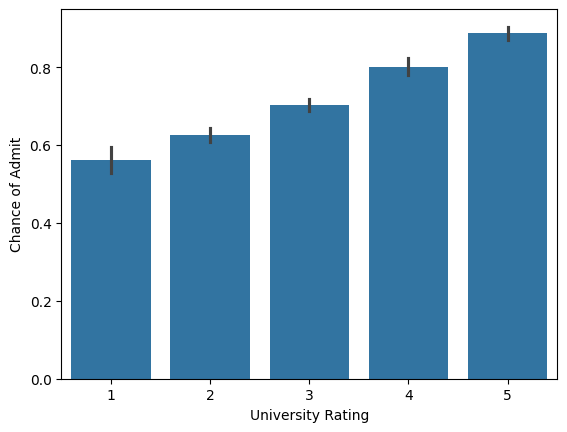

In [161]:
sns.barplot(x='University Rating', y='Chance of Admit', data=ds_with_necessary_cols)

***We can observe that as the University rating increases the chances of getting admission is also getting increased.***

<Axes: xlabel='SOP', ylabel='Chance of Admit'>

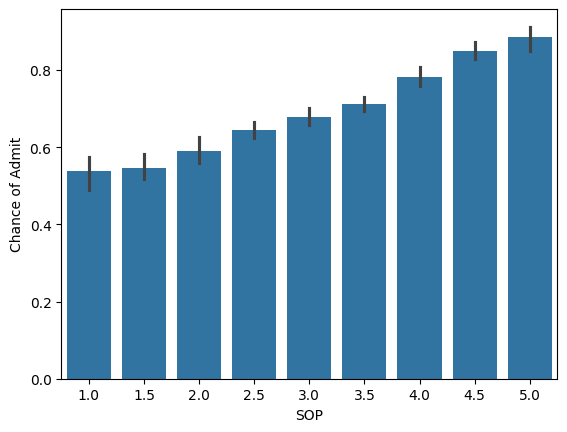

In [162]:
sns.barplot(x='SOP', y='Chance of Admit', data=ds_with_necessary_cols)

***We can observe that a person with higher SOP is having high chances of getting admission.***

<Axes: xlabel='LOR', ylabel='Chance of Admit'>

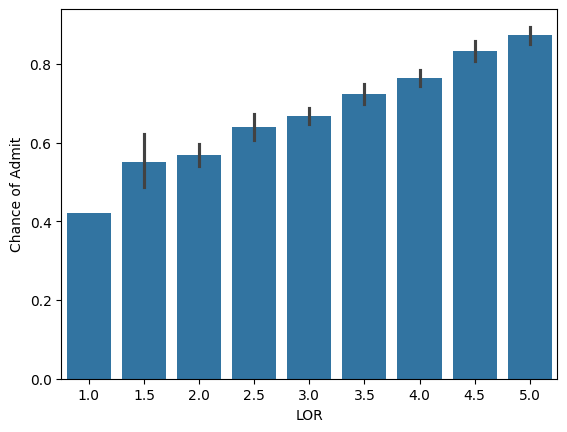

In [163]:
sns.barplot(x='LOR', y='Chance of Admit', data=ds_with_necessary_cols)

***We can observe that a person with higher LOR is having high chances of getting admission.***

<Axes: xlabel='CGPA', ylabel='Chance of Admit'>

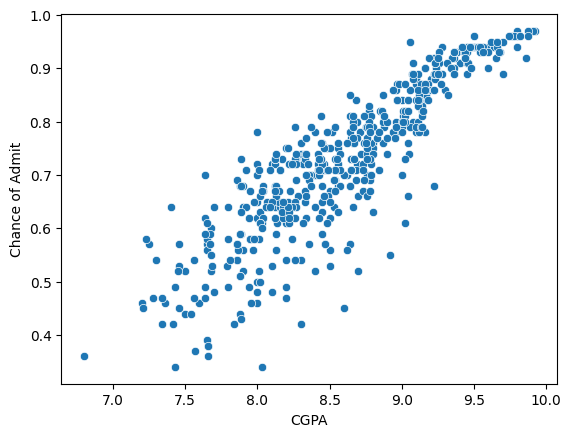

In [164]:
sns.scatterplot(x='CGPA', y='Chance of Admit', data=ds_with_necessary_cols)

***We can observe a linear relationship between CGPA and Chance of Admit but with less variance compared to TOEFL and GRE scores***

###**MultiVariate Analysis**

In [165]:
ds_with_necessary_cols.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

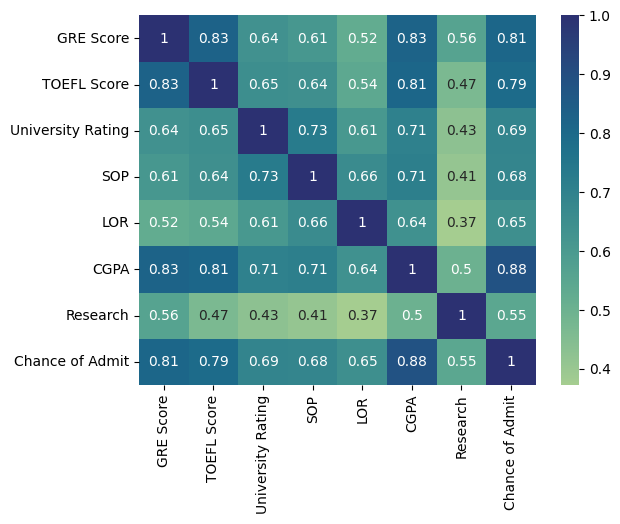

In [166]:
sns.heatmap(ds_with_necessary_cols.corr(), cmap='crest', annot=True)

***From the correlation analysis we can see that the CGPA, GRE, TOEFL Scores are having high positive correlation with "Chance Of Admission" for a individual when compared to other features***

***Also need to note that there are no columns with negative correlation.***

##**Feature Scaling**

In [167]:
ds_with_necessary_cols.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


From the above statistics we can observe that

- **GRE Score** is ranging from 290 to 340 with a standard deviation of 11.29
- **TOEFL Score** is ranging from 92 to 120 with a standard deviation of 6
- **University Rating** is ranging from 1 to 5 with a standard deviation of 1
- **SOP** is ranging from 1 to 5 with a standard deviation of 1
- **LOR** is ranging from 1 to 5 with a standard deviation of 1
- **CGPA** is ranging from 6 to 10 with a standard deviation of 0.5
- **Research** is ranging from 0 to 1 as a categorical variable
- **Chance Of Admit** is ranging from 0 to 100%

So inorder to use the features for preparing a linear regression model we first need to bring all the features into same range using
- MinMax Scaler(Normalization) method (or)
- StandardScaler (Standardization) method

Based on the above stats mentioned, we need to perform scaling on the below columns only

- **GRE Score**, **TOEFL Score**, **CGPA** -> StandardScaler as there is large variance is observed, needs to bring down to align with other columns.

- **University Rating**, **SOP**, **LOR** -> Scaling not needed, as this is already ordinal data.

- **Research** -> Scaling not needed as this is already a categorical feature.

- **Chance Of Admit** -> No Scaling needed, as this is a dependent feature ranging from 0 till 1.

Here,
- We have chosen StandardScaler because we can see that the data is **close to normally distributed** with **reasonable variance**.

- **StandardScaler (Z-score normalization)** centers data around 0 with a unit standard deviation.

- Works best for linear models, KNN, SVM, PCA, etc.

**Below are the evidences:**


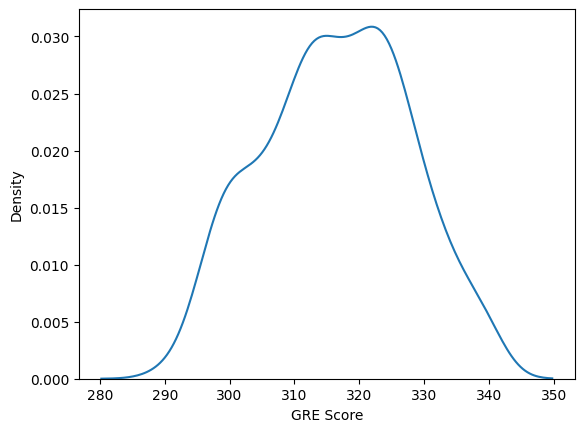

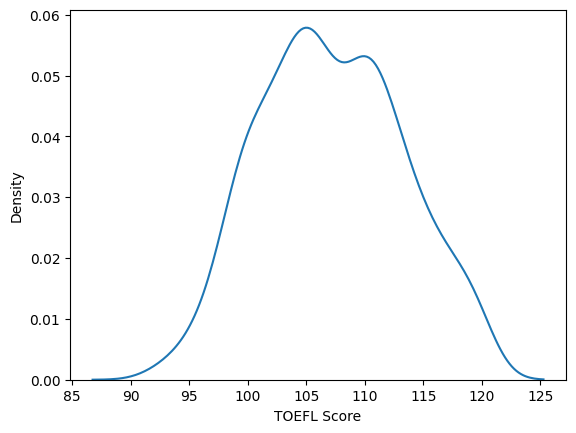

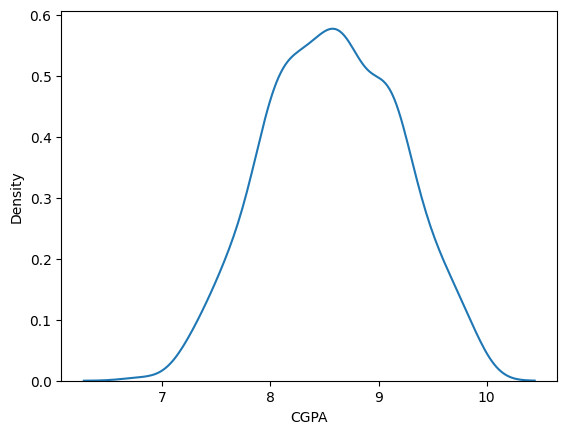

In [168]:
cols_for_skew_check = ['GRE Score', 'TOEFL Score', 'CGPA']

for col in cols_for_skew_check:
  plt.figure()
  sns.kdeplot(ds_with_necessary_cols[col])

In [169]:
std_scaler = StandardScaler()
# ds_with_necessary_cols[['GRE Score', 'TOEFL Score', 'CGPA']] = std_scaler.fit_transform(ds_with_necessary_cols[['GRE Score', 'TOEFL Score', 'CGPA']])
scaled_array = std_scaler.fit_transform(ds_with_necessary_cols.drop(columns = ['Chance of Admit']))

In [170]:
X = ds_with_necessary_cols.drop(columns=['Chance of Admit'])
scaled_ds = pd.DataFrame(scaled_array, columns=X.columns)

In [171]:
scaled_ds.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


In [172]:
scaled_ds.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,1.762146e-15,1.136868e-15,1.421085e-16,-8.526513e-17,4.263256e-17,3.119283e-15,-7.815970e-17
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.346008e+00,-2.500419e+00,-1.850542e+00,-2.397950e+00,-2.686789e+00,-2.940115e+00,-1.128152e+00
25%,-7.508077e-01,-6.899523e-01,-9.751676e-01,-8.828175e-01,-5.235128e-01,-7.430227e-01,-1.128152e+00
50%,4.679255e-02,-3.160087e-02,-9.979274e-02,1.272712e-01,1.730621e-02,-2.720919e-02,8.864053e-01
75%,7.557706e-01,7.913384e-01,7.755821e-01,6.323155e-01,5.581253e-01,7.672196e-01,8.864053e-01
max,2.085104e+00,2.108041e+00,1.650957e+00,1.642404e+00,1.639763e+00,2.223672e+00,8.864053e-01


**The Data is scaled now using Standard Scaler.**

Now as the data is now ready for building linear regression model.
Let's work on splitting the data into train and test datasets.

In [173]:
scaled_ds.shape

y = ds_with_necessary_cols['Chance of Admit']
X = scaled_ds

X_train, X_test, y_train, y_test = train_test_split(X, y , train_size=0.8, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 7)
(400,)
(100, 7)
(100,)


In [174]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [175]:
y_pred = lr_model.predict(X_test)
y_pred

array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498,
       0.72193204, 0.72589118, 0.65632227, 0.93677168, 0.8241518 ,
       0.50979177, 0.83931942, 0.59727295, 0.53339576, 0.57155958,
       0.66548168, 0.55305833, 0.72232308, 0.79506004, 0.78027648,
       0.60248654, 0.94840363, 0.84741471, 0.62777011, 0.74343096,
       0.55533035, 0.73004034, 0.54474225, 0.86116288, 0.65713016,
       0.7371816 , 0.55423839, 0.95718977, 0.64364267, 0.71057279,
       0.97036982, 0.57495143, 0.67075391, 0.85830422, 0.94112903,
       0.57793762, 0.9583926 , 0.83902765, 0.79591651, 0.92570648,
       0.88805969, 0.56366238, 0.70359711, 0.52658929, 0.9536427 ,
       0.59746814, 0.95600396, 0.73916386, 0.66256982, 0.5012903 ,
       0.62950759, 0.68031188, 0.59896721, 0.59203806, 0.44085868,
       0.58866369, 0.8667547 , 0.89783006, 0.65831807, 0.70667392,
       0.6176818 , 0.78587721, 0.69152566, 0.56271019, 0.55429

In [176]:
train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)
print('Loss ::: ',mean_squared_error(y_test, y_pred))

Loss :::  0.0037046553987884097


In [177]:
print(f"train score ::: {train_score}")
print(f"test score ::: {test_score}")

train score ::: 0.8210671369321554
test score ::: 0.8188432567829629


In [178]:
coeff_list = list(zip(X_test.columns, np.round(lr_model.coef_,4)))
print(f"Coefficients ::: {coeff_list}")
print(f"Intercept ::: {lr_model.intercept_}")

Coefficients ::: [('GRE Score', np.float64(0.0275)), ('TOEFL Score', np.float64(0.0182)), ('University Rating', np.float64(0.0029)), ('SOP', np.float64(0.0018)), ('LOR', np.float64(0.0159)), ('CGPA', np.float64(0.068)), ('Research', np.float64(0.0119))]
Intercept ::: 0.7228307247435319


**Coefficients :::**

- GRE Score  : 0.027
- TOEFL Score : 0.018
- University Rating : 0.0029
- SOP : 0.0017
- LOR : 0.015
- CGPA : 0.067
- Research : 0.011

**Intercept :** 0.722



In [179]:
imp = pd.DataFrame(coeff_list, columns=["Feature", "Importance"])
imp

,Feature,Importance
0,GRE Score,0.0275
1,TOEFL Score,0.0182
2,University Rating,0.0029
3,SOP,0.0018
4,LOR,0.0159
5,CGPA,0.0680
6,Research,0.0119


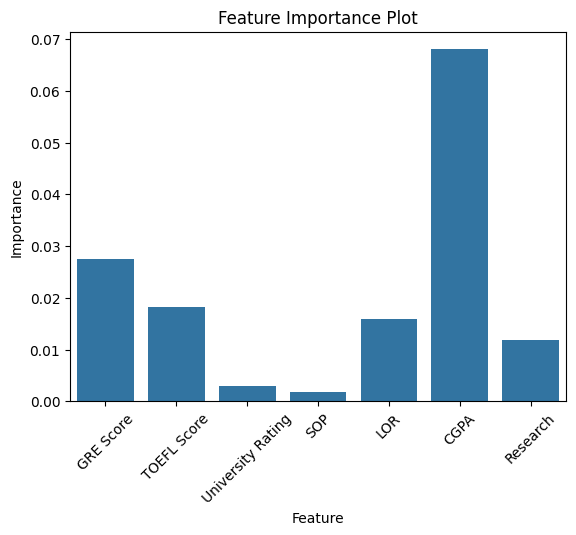

In [180]:
plt.figure()
sns.barplot(x = imp['Feature'], y = imp['Importance'])
plt.xticks(rotation=45)
plt.title('Feature Importance Plot')
plt.show()

In [181]:
print(imp[imp['Importance'] == max(imp['Importance'])])
print(imp[imp['Importance'] == min(imp['Importance'])])

  Feature  Importance
5    CGPA       0.068
  Feature  Importance
3     SOP      0.0018


As per the model we can clearly see that
- **CGPA** has the **highest importance** and
- **SOP** has the **least importance**

###**Ridge Regression Model :**

In [182]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# print("Ridge Coefficients :: ",ridge.coef_)
print("Ridge MSE :: ", mean_squared_error(y_test, y_pred_ridge))
print(list(zip(X_train.columns, np.round(ridge.coef_, 4))))

Ridge MSE ::  0.003705565796587463
[('GRE Score', np.float64(0.0276)), ('TOEFL Score', np.float64(0.0183)), ('University Rating', np.float64(0.003)), ('SOP', np.float64(0.0019)), ('LOR', np.float64(0.016)), ('CGPA', np.float64(0.0674)), ('Research', np.float64(0.0119))]


###**Lasso Regression Model :**

In [183]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso MSE :: ",mean_squared_error(y_test, y_pred_lasso))
# lasso_coeff = pd.DataFrame(list(zip(X_train.columns, np.round(lasso.coef_, 4))), columns=['Feature', 'Importance'])
# lasso_coeff

print(list(zip(X_train.columns, np.round(lasso.coef_, 4))))

Lasso MSE ::  0.020598230624999995
[('GRE Score', np.float64(0.0)), ('TOEFL Score', np.float64(0.0)), ('University Rating', np.float64(0.0)), ('SOP', np.float64(0.0)), ('LOR', np.float64(0.0)), ('CGPA', np.float64(0.0)), ('Research', np.float64(0.0))]


In [184]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso MSE :: ",mean_squared_error(y_test, y_pred_lasso))
print(list(zip(X_train.columns, np.round(lasso.coef_, 4))))

Lasso MSE ::  0.015120114912104738
[('GRE Score', np.float64(0.0)), ('TOEFL Score', np.float64(0.0)), ('University Rating', np.float64(0.0)), ('SOP', np.float64(0.0)), ('LOR', np.float64(0.0)), ('CGPA', np.float64(0.0228)), ('Research', np.float64(0.0))]


In [185]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso MSE :: ",mean_squared_error(y_test, y_pred_lasso))

print(list(zip(X_train.columns, np.round(lasso.coef_, 4))))

Lasso MSE ::  0.003787814300491738
[('GRE Score', np.float64(0.0257)), ('TOEFL Score', np.float64(0.0158)), ('University Rating', np.float64(0.0011)), ('SOP', np.float64(0.0)), ('LOR', np.float64(0.0111)), ('CGPA', np.float64(0.0697)), ('Research', np.float64(0.0064))]


In [186]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso MSE :: ",mean_squared_error(y_test, y_pred_lasso))

print(list(zip(X_train.columns, np.round(lasso.coef_, 4))))

Lasso MSE ::  0.003695791995206996
[('GRE Score', np.float64(0.0273)), ('TOEFL Score', np.float64(0.018)), ('University Rating', np.float64(0.0028)), ('SOP', np.float64(0.0016)), ('LOR', np.float64(0.0155)), ('CGPA', np.float64(0.0682)), ('Research', np.float64(0.0114))]


####**Key Takeaways from Ridge and Lasso Regularisation methods:**

- Here we can observe that ridge regularisation is giving the best ouput at alpha=1
- Whereas in the Lasso regularisation method we can observe that we need to give a very low alpha to get the lowest error model.
- Above are the outputs for different values of Alpha.

##**StatsModel API**

In [187]:
X_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sat, 21 Jun 2025   Prob (F-statistic):          3.41e-142
Time:                        16:22:42   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7228      0.00

###**Key Takeaways:**

- **R2 score** is **82.1%** which says the model is  **significantly strong**.
- **CGPA, GRE, TOEFL, LOR, Research** are significantly important in the mentioned order.
- **SOP** and **Univeristy Ranking** are less significant, can be removed it needed.

##**Validating the assumptions of Linear Regression**

####**Assumption Check 1 : Multi Collinearity Check by Variable Inflation Factor(VIF)**

In [188]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

In [189]:
vif

,Features,VIF
0,GRE Score,4.489201
1,TOEFL Score,3.665067
2,University Rating,2.571847
3,SOP,2.785753
4,LOR,1.977668
5,CGPA,4.653698
6,Research,1.517206


- We can clearly see that none of the variavles are having higher variance inflation factor(VIF) > 5.
- It is evident that **none of the variables are multicollinear**

**Below is the Util function for dimensionality reduction using Variance Inflation Factor**

In [190]:
def vif_based_dimensionality_reduction(vif):
  for i in range(len(vif)):
    if (vif.iloc[i]['VIF'] > 5).any():
      vif_lr_model = lr_model.fit(X_train.drop(columns=[vif.iloc[i]['Features']]), y_train)
      train_r2_score = vif_lr_model.score(X_train.drop(columns=[vif.iloc[i]['Features']]), y_train)
      print("Train Score :: ",train_r2_score)

      if train_r2_score < 0.80:
        break;
      else :
        X_train = X_train.drop(columns=[vif.iloc[i]['Features']])
        X_test = X_test.drop(columns=[vif.iloc[i]['Features']])
      # print("Test Score :: ",vif_lr_model.score(X_test.drop(columns=[vif.iloc[i]['Features']]), y_test))


X_train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

####**Assumption Check 2 : Mean of the Residual Graph**

#####**Linear Regression Model**

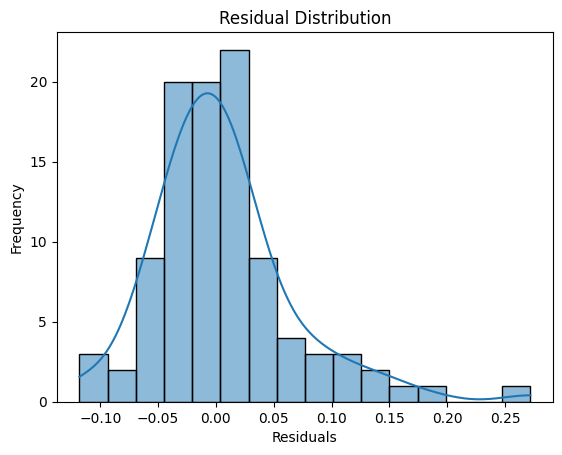

In [191]:
lr_residuals = y_pred - y_test

plt.figure()
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
sns.histplot(lr_residuals, kde=True)
plt.show()

From the plot it is evident that the residuals are slightly skewed towards right and let's check how much it is skewed exactly.

In [192]:
print(skew(lr_residuals))

1.2875994360214493


- Here we can observe a high amount of skewness towards positive (right).
- This **violates** the assumption of Linear Regression (**Normal Distribution of Residuals**)
- Let's try few techniques like log normalisation on the target variable and check for the

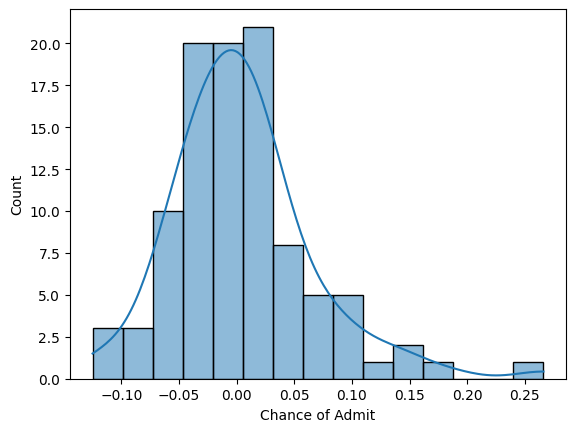

In [193]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

lr_model_log = LinearRegression()
lr_model_log.fit(X_train, y_train_log)

y_pred_log = lr_model_log.predict(X_test)
y_pred_log

y_pred_log_rev = np.expm1(y_pred_log)

y_residual_log = y_pred_log_rev - y_test

plt.figure()
sns.histplot(y_residual_log, kde=True)
plt.show()

In [194]:
skew(y_residual_log)

np.float64(1.146047161313172)

In [195]:
X_train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

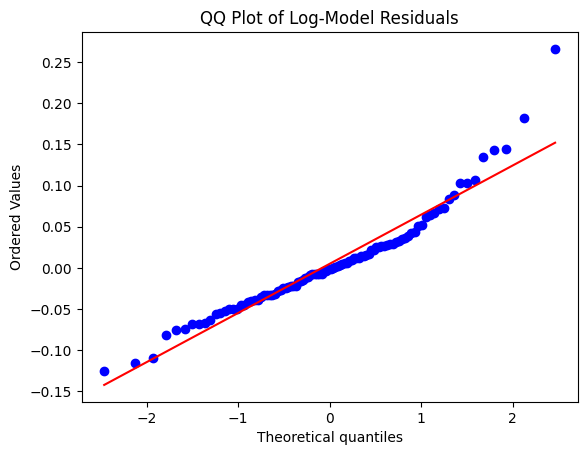

In [196]:
stats.probplot(y_residual_log, dist="norm", plot=plt)
plt.title("QQ Plot of Log-Model Residuals")
plt.show()

- Here we can observe that the skewness still reduced to 1.15 only which is not a high difference.
- But think this much of skewness is normal in the real world scenario as we have tried using log also. We can go for next assumption check.

####**Assumption Check 3 : Homoscedasticity**

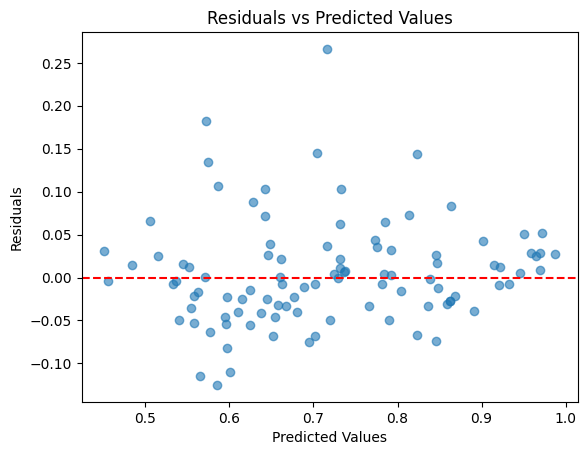

In [197]:
plt.figure()
plt.scatter(y_pred_log_rev, y_residual_log, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

***The Residuals vs Predicted plot suggests that the residuals have constant variance, indicating that the assumption of homoscedasticity is reasonably satisfied. Although a few outliers are present, the overall spread remains consistent across predicted values.***

####**Assumption Check 4: Linearity Check Between Variables**

**Linearity Check for Numerical Features :**

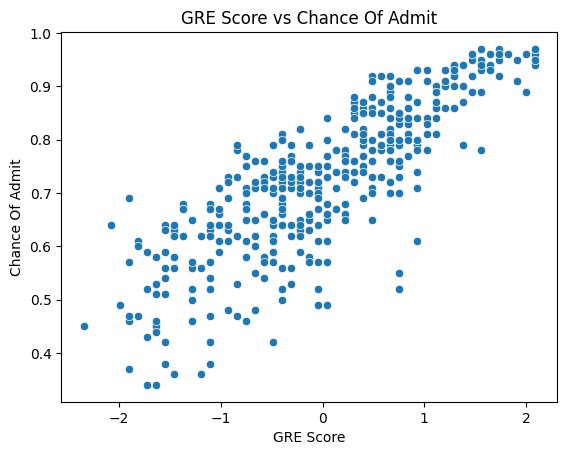

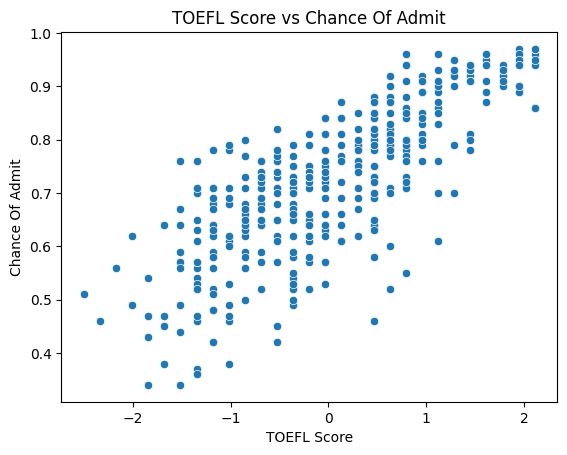

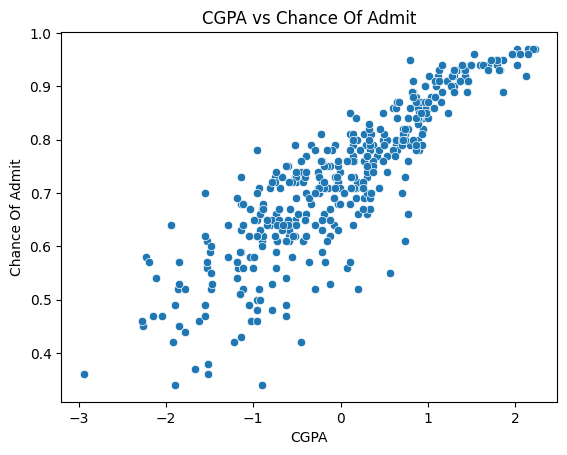

In [198]:
numerical_cols = ['GRE Score', 'TOEFL Score', 'CGPA']

for col in numerical_cols:
  plt.figure()
  plt.xlabel(col)
  plt.ylabel('Chance Of Admit')
  plt.title(f'{col} vs Chance Of Admit')
  sns.scatterplot(x = X_train[col], y = y_train)
  plt.show()

**Linearity Check for Categorical Features :**

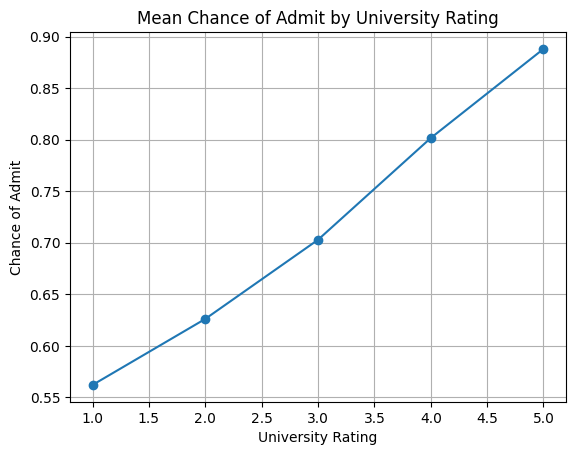

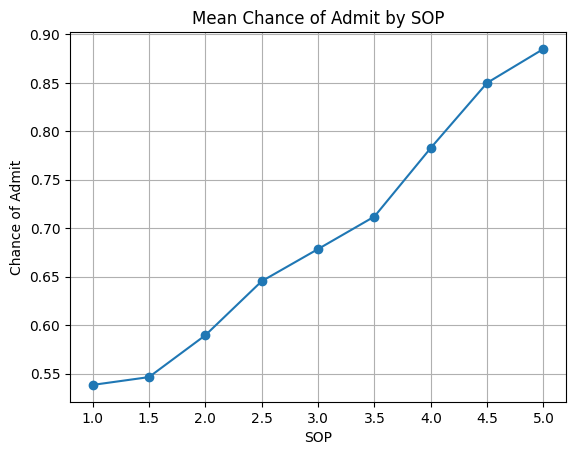

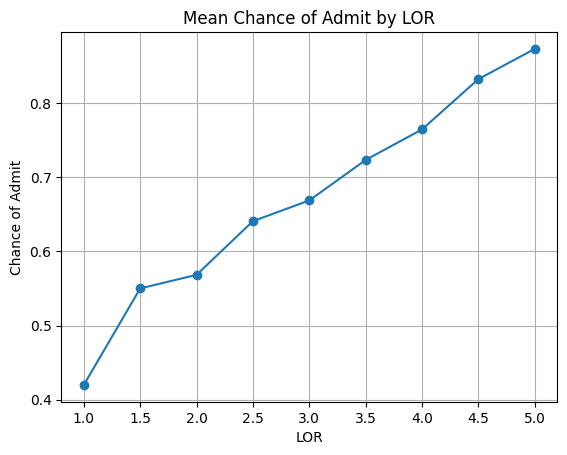

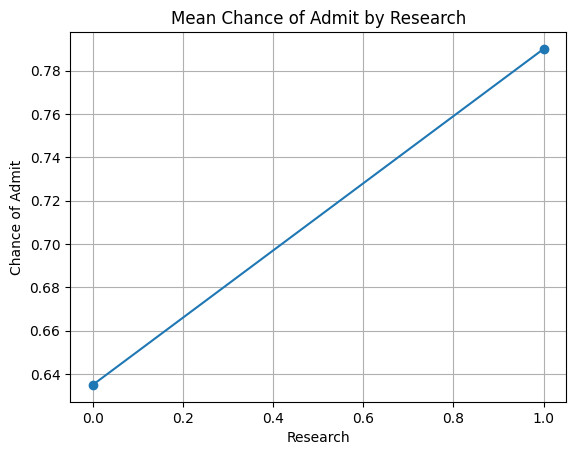

In [199]:
cat_cols = ['University Rating', 'SOP', 'LOR', 'Research']

for col in cat_cols:
    mean_target = ds_with_necessary_cols.groupby(col)['Chance of Admit'].mean()
    mean_target.plot(marker='o')
    plt.title(f'Mean Chance of Admit by {col}')
    plt.ylabel('Chance of Admit')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

***All the categorical and numerical features do align with target variable linearly***

####**Assumption Check 5: Mean of Residuals**

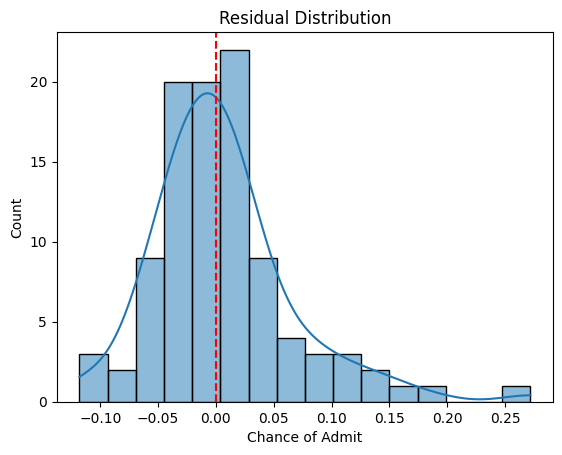

In [200]:
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red', linestyle='--')  # Mean line
plt.title('Residual Distribution')
plt.show()

In [201]:
residuals = y_pred - y_test
np.mean(residuals)

np.float64(0.00545362371766135)

- **Here we can see that the mean of residual error is 0.0054 which is way almost equal to 0. So we can say that this assumption is also true.**

- **We can work on the linear regression model metrics further.**

###**Performance Metrics**

####**Linear Regression Model :**

In [202]:
def adjusted_r2_score(r2, n, p ):
  return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

In [203]:
# Get adjusted R²
n = X_test.shape[0]   # number of samples
p = X_test.shape[1]   # number of features

print(f"Mean Squared Error : {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error : {root_mean_squared_error(y_test, y_pred)}")
r2_score_train = lr_model.score(X_train, y_train)
r2_score_test = lr_model.score(X_test, y_test)
print(f"R2 Score on train data : {r2_score_train}")
print(f"R2 Score on test data : {r2_score_test}")

adj_r2_score_train = adjusted_r2_score(r2_score_train, n, p)
adj_r2_score_test = adjusted_r2_score(r2_score_test, n, p)

print("Adjusted R2 on train data :", adj_r2_score_train)
print("Adjusted R2 on test data :", adj_r2_score_test)

Mean Squared Error : 0.0037046553987884097
Root Mean Squared Error : 0.06086588041578311
R2 Score on train data : 0.8210671369321554
R2 Score on test data : 0.8188432567829629
Adjusted R2 on train data : 0.807452679959602
Adjusted R2 on test data : 0.8050595915381884


| Metric      | Train | Test   | Interpretation                           |
| ----------- | ----- | ------ | ---------------------------------------- |
| MSE         | —     | 0.0037 | **Avg squared error, small ⇒ good**          |
| RMSE        | —     | 0.0609 | **Avg prediction error \~6% ⇒ good**        |
| R²          | 0.821 | 0.819  | **82% variance explained ⇒ strong model**    |
| Adjusted R² | 0.807 | 0.805  | **Features are meaningful, low overfitting** |


##**Overall Insights :**

- Model prediction is very decent with a very minimal amount of overfitting and all the features are meaningful and linear towards the target variable.
- All the features are significantly contribute for the predicton of the chance of admission.
  - Of them CGPA and GRE contribute more when compared to other features
  - Where as SOP and University Rating contribute very less when compared to other features.


| Suggested Data Source            | Why It Helps                                                                 |
| -------------------------------- | ---------------------------------------------------------------------------- |
| **Undergrad University Tier**    | Adds context to CGPA — 9.0 from MIT ≠ 9.0 from an unknown college.           |
| **Published Research/Papers**    | Enriches "Research" variable from binary to more detailed impact.            |
| **Internships or Work Exp**      | Helps distinguish applicants with practical exposure — strong predictor.     |
| **Statement of Purpose Score**   | Use NLP to score SOPs — aligns well with real-world admissions reviews.      |
| **Recommendation Letter Score**  | If available, convert to quality score (e.g., sentiment analysis).           |
| **Target University Attributes** | Accept rates, average GRE/TOEFL — helps model school-specific probabilities. |


-------------------------------------------------------------------------------

| Aspect                     | Real-World Implementation                                                |
| -------------------------- | ------------------------------------------------------------------------ |
| **Web Portal Integration** | Applicants could see an estimated admit chance while filling the form.   |
| **Admissions Dashboards**  | Officers get probability scores to help triage or prioritize candidates. |
| **Mobile App/Chatbot**     | Provide instant eligibility feedback for student queries.                |
| **Batch Scoring API**      | Admissions office runs the model on thousands of applications at once.   |



-------------------------------------------------------------------------------


| Business Benefit                  | Impact                                                                 |
| --------------------------------- | ---------------------------------------------------------------------- |
| **Better Application Filtering**  | Reduce human effort by pre-filtering borderline applicants.            |
| **Improved Candidate Experience** | Applicants get real-time insights ⇒ higher satisfaction.               |
| **Higher Admission Yield**        | Target high-fit students more precisely ⇒ better enrollment rates.     |
| **Data-Driven Strategy**          | Schools can refine outreach efforts based on admit probability trends. |
| **Cost Optimization**             | Save time and money by reducing unnecessary manual reviews.            |
